# ESSENTIAL IMPORTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# READING THE DATA

In [40]:
crimes=pd.read_csv('crime.csv')

In [41]:
crimes.head()
#crimes.info()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


# DATA-CLEANING

In [5]:
#Missing-data
for column in crimes.columns:
    per=np.mean(crimes[column].isnull())
    per=per*100
    print(f' the {column} column has {per}% nulls')
#print(np.mean(crimes['SHOOTING'].isnull())*100,'%')

 the INCIDENT_NUMBER column has 0.0% nulls
 the OFFENSE_CODE column has 0.0% nulls
 the OFFENSE_CODE_GROUP column has 0.0% nulls
 the OFFENSE_DESCRIPTION column has 0.0% nulls
 the DISTRICT column has 0.5531649497137019% nulls
 the REPORTING_AREA column has 0.0% nulls
 the SHOOTING column has 99.6806373463126% nulls
 the OCCURRED_ON_DATE column has 0.0% nulls
 the YEAR column has 0.0% nulls
 the MONTH column has 0.0% nulls
 the DAY_OF_WEEK column has 0.0% nulls
 the HOUR column has 0.0% nulls
 the UCR_PART column has 0.02820671131684599% nulls
 the STREET column has 3.407057319171475% nulls
 the Lat column has 6.2678446625066995% nulls
 the Long column has 6.2678446625066995% nulls
 the Location column has 0.0% nulls


In [6]:
crimes['SHOOTING']=crimes['SHOOTING'].fillna(value='NO')
crimes.head()
crimes['SHOOTING'].unique()
#One way to deal with the missing values two possible values for shooting YES or NO

array(['NO', 'Y'], dtype=object)

In [10]:
#Another way dealing with the missing data
#cols=['DISTRICT','SHOOTING','UCR_PART','STREET','Lat','Long']
crimes1=crimes.drop('SHOOTING',axis=1)#taking away the shooting column with the most nulls 99%
#crimes1.info()
crimes1=crimes1.dropna()#dropping all rows with nulls
crimes1.head(5)
#sns.heatmap(crimes1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#through this heatmap we see that on crimes1 dataframe we have no nulls

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [39]:
#crimes['Year Correct']=crimes['OCCURRED_ON_DATE'].str[:4]
#crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Year Correct
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018


In [31]:
crimes1['Year Correct']=crimes1['OCCURRED_ON_DATE'].astype(str).str[:4]
crimes1['Month Correct']=crimes1['OCCURRED_ON_DATE'].astype(str).str[5:7]
crimes1['Hour Correct']=crimes1['OCCURRED_ON_DATE'].astype(str).str[11:13]
months={'01':'January','02':'February','03':'March','04':'April','05':'May','06':'June','07':'July','08':'August','09':'September','10':'Octomber','11':'November','12':'December'}
#crimes1['Month Correct']=crimes1['Month Correct'].astype('int64')
crimes1['Month Correct']=crimes1['Month Correct'].map(months)
#correcting the year,Month and hour 
pd.set_option('display.max_rows',None)
crimes1.head()
crimes1.dtypes


INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
Year Correct            object
Month Correct           object
Hour Correct            object
dtype: object

# SOME DATA EXPLORATION AND VISUALIZATION

In [10]:
#finding what type of crimes are most common 
crimes1['OFFENSE_CODE_GROUP'].value_counts()
#crimes1['OFFENSE_DESCRIPTION'].value_counts()
#most common offense
#crimes1['OFFENSE_CODE'].value_counts()
#3115=investigate person 153 row

Motor Vehicle Accident Response     30385
Larceny                             25070
Medical Assistance                  22373
Investigate Person                  17973
Other                               17028
Simple Assault                      14852
Vandalism                           14846
Drug Violation                      14396
Verbal Disputes                     12947
Towed                               10736
Investigate Property                10594
Larceny From Motor Vehicle          10239
Property Lost                        9311
Warrant Arrests                      7523
Aggravated Assault                   7219
Fraud                                5684
Residential Burglary                 5579
Violations                           5001
Missing Person Located               4868
Auto Theft                           4501
Robbery                              4204
Harassment                           3949
Missing Person Reported              3735
Property Found                    

In [12]:
crimes1['Location'].value_counts()
crimes1['STREET'].value_counts()
#Location where the crime is most likely to happen
#Washington street with the  most crimes

WASHINGTON ST                14107
BLUE HILL AVE                 6988
BOYLSTON ST                   6939
DORCHESTER AVE                5007
TREMONT ST                    4663
MASSACHUSETTS AVE             4392
CENTRE ST                     4284
HARRISON AVE                  4274
COMMONWEALTH AVE              3865
HYDE PARK AVE                 3401
COLUMBIA RD                   3051
HUNTINGTON AVE                2910
RIVER ST                      2810
WARREN ST                     2293
DUDLEY ST                     2201
COLUMBUS AVE                  2063
ADAMS ST                      1966
NEWBURY ST                    1887
BEACON ST                     1779
W BROADWAY                    1608
GENEVA AVE                    1582
BOWDOIN ST                    1581
CAMBRIDGE ST                  1512
AMERICAN LEGION HWY           1510
ALBANY ST                     1256
HANCOCK ST                    1233
NEW SUDBURY ST                1213
SUMMER ST                     1208
BORDER ST           

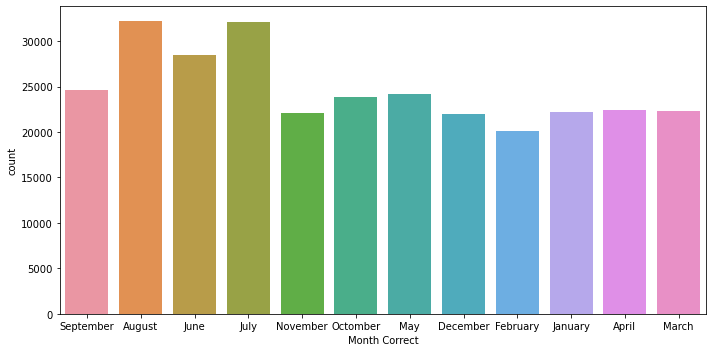

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month Correct',data=crimes1)
plt.tight_layout()
#most crimes in August

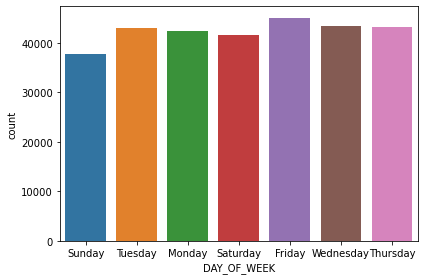

In [15]:
sns.countplot(x='DAY_OF_WEEK',data=crimes1)
plt.tight_layout()
#most crimes on Friday

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='Hour Correct'>

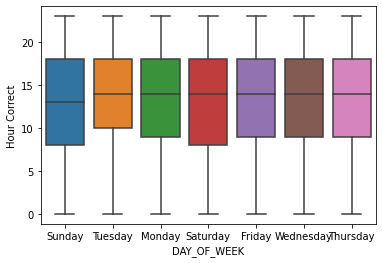

In [32]:
crimes1['Hour Correct']=crimes1['Hour Correct'].astype('int64')
sns.boxplot(x='DAY_OF_WEEK',y='Hour Correct',data=crimes1)
#we see that around 13:00 at noon is when most crimes oocur on Sundays whearis at 15:00 on the other days

In [18]:
crimes1.dtypes


INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
Year Correct            object
Month Correct           object
Hour Correct            object
dtype: object

In [52]:
#Where happened the most shootings
crimes[crimes['SHOOTING']=='Y']['STREET'].value_counts()
#Most shhotings happened in WASHINGTON ST

WASHINGTON ST                46
BLUE HILL AVE                32
DUDLEY ST                    24
COLUMBIA RD                  23
CENTRE ST                    16
ANNUNCIATION RD              15
TREMONT ST                   14
GENEVA AVE                   10
BOWDOIN ST                   10
MASSACHUSETTS AVE            10
RIVER ST                      9
NORFOLK ST                    9
ADAMS ST                      9
BOWER ST                      8
SCHROEDER PLZ                 8
PENINSULA PL                  7
COLUMBUS AVE                  7
SOUTHERN AVE                  7
CABOT ST                      7
WALK HILL ST                  7
HARTFORD ST                   7
SHAWMUT AVE                   7
PARKER ST                     7
DUDLEY TER                    7
CRESTON ST                    6
HOMESTEAD ST                  6
QUINCY ST                     6
INTERVALE ST                  6
RUGGLES ST                    6
STRATTON ST                   6
COPELAND ST                   6
COVENTRY

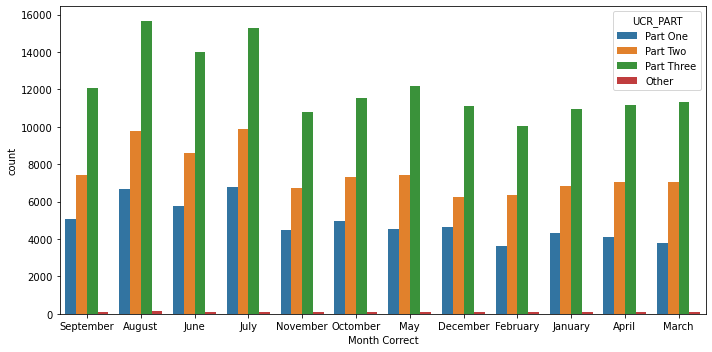

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month Correct',hue='UCR_PART',data=crimes1)
plt.tight_layout()
#in all months most crimes belong to part three ucr

In [24]:
crimes1.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
Year Correct            object
Month Correct           object
Hour Correct            object
dtype: object